In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2026-01-05 15:34:48.662929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767627288.916449      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767627288.994973      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767627289.603405      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767627289.603468      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767627289.603471      55 computation_placer.cc:177] computation placer alr

In [2]:
with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'
with_mask_files = os.listdir(with_mask_path)
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [3]:
without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'
without_mask_files = os.listdir(without_mask_path)
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [4]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [5]:
# convert images to numpy arrays+
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

print(len(data))

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7553


In [6]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [7]:
type(data[0])

numpy.ndarray

In [8]:
data[0].shape

(128, 128, 3)

In [9]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

labels = with_mask_labels + without_mask_labels


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
# convert image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [11]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)
(7553,) (6042,) (1511,)


In [13]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [14]:
X_train[10]

array([[[101, 119, 126],
        [105, 125, 136],
        [120, 144, 163],
        ...,
        [ 44,  38,  24],
        [ 44,  38,  22],
        [ 44,  39,  20]],

       [[114, 134, 143],
        [ 90, 114, 126],
        [117, 143, 163],
        ...,
        [ 44,  38,  24],
        [ 43,  37,  21],
        [ 43,  38,  19]],

       [[122, 147, 162],
        [108, 137, 152],
        [101, 130, 151],
        ...,
        [ 45,  39,  24],
        [ 47,  41,  25],
        [ 47,  42,  23]],

       ...,

       [[ 18,  25,  49],
        [ 33,  24,  31],
        [113,  83,  62],
        ...,
        [ 44,  43,  21],
        [ 40,  39,  13],
        [ 44,  42,  16]],

       [[ 15,  21,  45],
        [ 37,  26,  29],
        [ 96,  64,  40],
        ...,
        [ 50,  50,  26],
        [ 53,  52,  24],
        [ 42,  41,  12]],

       [[ 20,  25,  49],
        [ 55,  42,  44],
        [103,  71,  47],
        ...,
        [ 61,  61,  36],
        [104, 103,  74],
        [ 97,  96,  66]]

In [15]:
X_train_scaled[10]

array([[[0.39607843, 0.46666667, 0.49411765],
        [0.41176471, 0.49019608, 0.53333333],
        [0.47058824, 0.56470588, 0.63921569],
        ...,
        [0.17254902, 0.14901961, 0.09411765],
        [0.17254902, 0.14901961, 0.08627451],
        [0.17254902, 0.15294118, 0.07843137]],

       [[0.44705882, 0.5254902 , 0.56078431],
        [0.35294118, 0.44705882, 0.49411765],
        [0.45882353, 0.56078431, 0.63921569],
        ...,
        [0.17254902, 0.14901961, 0.09411765],
        [0.16862745, 0.14509804, 0.08235294],
        [0.16862745, 0.14901961, 0.0745098 ]],

       [[0.47843137, 0.57647059, 0.63529412],
        [0.42352941, 0.5372549 , 0.59607843],
        [0.39607843, 0.50980392, 0.59215686],
        ...,
        [0.17647059, 0.15294118, 0.09411765],
        [0.18431373, 0.16078431, 0.09803922],
        [0.18431373, 0.16470588, 0.09019608]],

       ...,

       [[0.07058824, 0.09803922, 0.19215686],
        [0.12941176, 0.09411765, 0.12156863],
        [0.44313725, 0

**Building a Convolutional Neural Networks (CNN)**

In [16]:
import tensorflow as tf
from tensorflow import keras

**Build function replace Conv2D in Keras**

**Build function replace MaxPooling2D in Keras**

In [29]:
num_of_classes = 2

model = keras.Sequential([
    # Block 1
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Block 2
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Block 3
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_of_classes, activation='softmax')
])

# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,296,066 (16.39 MB)

 Trainable params: 4,296,066 (16.39 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Lưu model tốt nhất trong quá trình train
checkpoint = ModelCheckpoint(
    'best_mask_model.h5',
    monitor='val_acc',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model.fit(
    X_train_scaled, 
    Y_train, 
    validation_split=0.2,      
    epochs=8, 
    batch_size=128,
    callbacks=[early_stopping,checkpoint],    
    verbose=1
)

from sklearn.metrics import classification_report
import numpy as np

Y_pred = model.predict(X_test_scaled)
Y_pred_labels = np.argmax(Y_pred, axis=1)

print(classification_report(Y_test, Y_pred_labels, target_names=['Without mask', 'With mask']))

loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5953 - loss: 0.6625

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


38/38 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.5974 - loss: 0.6608 - val_accuracy: 0.8834 - val_loss: 0.3494
Epoch 2/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8481 - loss: 0.3869

38/38 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.8486 - loss: 0.3858 - val_accuracy: 0.9074 - val_loss: 0.2366
Epoch 3/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8759 - loss: 0.3099

38/38 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.8762 - loss: 0.3092 - val_accuracy: 0.9123 - val_loss: 0.2237
Epoch 4/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9157 - loss: 0.2183

38/38 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.9155 - loss: 0.2186 - val_accuracy: 0.9231 - val_loss: 0.1966
Epoch 5/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9287 - loss: 0.1892

38/38 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.9287 - loss: 0.1893 - val_accuracy: 0.9396 - val_loss: 0.1644
Epoch 6/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9375 - loss: 0.1707

38/38 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.9375 - loss: 0.1707 - val_accuracy: 0.9421 - val_loss: 0.1642
Epoch 7/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9427 - loss: 0.1581

38/38 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.9426 - loss: 0.1582 - val_accuracy: 0.9355 - val_loss: 0.1966
Epoch 8/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9452 - loss: 0.1401

38/38 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.9452 - loss: 0.1400 - val_accuracy: 0.9504 - val_loss: 0.1419
Restoring model weights from the end of the best epoch: 8.
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step
              precision    recall  f1-score   support

Without mask       0.95      0.93      0.94       768
   With mask       0.93      0.95      0.94       743

    accuracy                           0.94      1511
   macro avg       0.94      0.94      0.94      1511
weighted avg       0.94      0.94      0.94      1511

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.9450 - loss: 0.1729
Test Accuracy: 0.9397749900817871


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = model.predict(X_test_scaled)
Y_pred_labels = np.argmax(Y_pred, axis=1)

print(classification_report(Y_test, Y_pred_labels, target_names=['Without mask', 'With mask']))

print(confusion_matrix(Y_test, Y_pred_labels))

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step
              precision    recall  f1-score   support

Without mask       0.95      0.93      0.94       768
   With mask       0.93      0.95      0.94       743

    accuracy                           0.94      1511
   macro avg       0.94      0.94      0.94      1511
weighted avg       0.94      0.94      0.94      1511

[[716  52]
 [ 39 704]]


In [33]:
h = history
print(h.history)

{'accuracy': [0.6774260401725769, 0.8653010725975037, 0.8861990571022034, 0.9079247117042542, 0.9286157488822937, 0.9377198219299316, 0.9404096603393555, 0.9466170072555542], 'loss': [0.5965738296508789, 0.3445271849632263, 0.2815684378147125, 0.22937223315238953, 0.19087184965610504, 0.1686840057373047, 0.16056862473487854, 0.13545168936252594], 'val_accuracy': [0.8833746910095215, 0.9073614478111267, 0.9123242497444153, 0.9230769276618958, 0.9396195411682129, 0.9421008825302124, 0.9354838728904724, 0.9503722190856934], 'val_loss': [0.3494047522544861, 0.23657473921775818, 0.22367729246616364, 0.19659772515296936, 0.16444627940654755, 0.16421112418174744, 0.19662773609161377, 0.14185085892677307]}


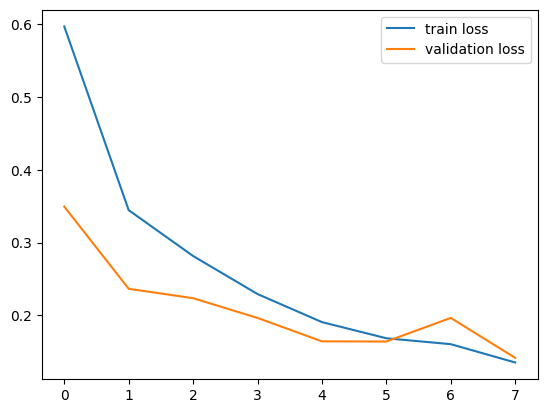

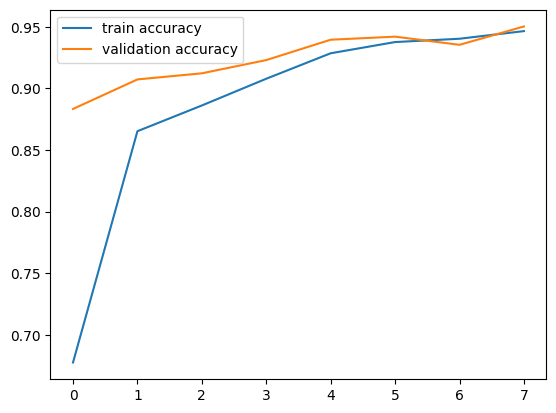

In [34]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

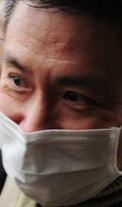

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.23284155 0.7671585 ]]
1
The person in the image is wearing a mask


In [35]:

input_image = cv2.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_20.jpg')

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')


In [37]:
model.save('/kaggle/working/mask_model.h5')